# EEG-5 Visualization of the classifier

In [1]:
import numpy as np
import pandas as pd
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn import tree

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
feature = pd.read_csv(r'data\feature.csv', index_col=0)
feature.head(10)

,ApEn,peek,RMS,mean frequency,label
0,0.067594,9,472.682642,3.5,1
1,0.037022,10,155.184031,5.0,1
2,0.009688,9,304.301872,5.5,1
3,0.029392,12,558.420084,7.5,1
4,0.052558,7,151.881867,3.0,1
5,0.014919,11,138.696101,3.5,1
6,0.028359,11,434.538039,11.5,1
7,0.017113,13,231.930831,3.0,1
8,0.029919,9,177.993019,1.5,1
9,0.029906,16,531.765711,15.5,1


## SVM RMS-ApEn

In [3]:
x_train1=pd.read_csv(r'classification\SVM\RMS-ApEn\x_train.csv', index_col=0)
y_train1=pd.read_csv(r'classification\SVM\RMS-ApEn\y_train.csv', index_col=0)
x_test1=pd.read_csv(r'classification\SVM\RMS-ApEn\x_test.csv', index_col=0)
y_test1=pd.read_csv(r'classification\SVM\RMS-ApEn\y_test.csv', index_col=0)

x_train1 = StandardScaler().fit_transform(x_train1)
x_test1 = StandardScaler().fit_transform(x_test1)

In [4]:
svm1 = joblib.load('classification\SVM\RMS-ApEn\EEG_svm.m') 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


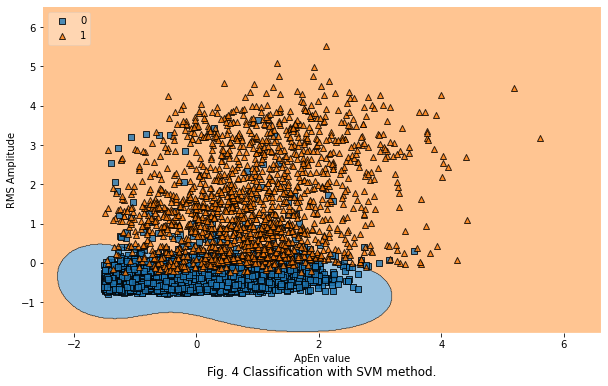

In [5]:
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(x_train1), np.array(y_train1).flatten(), clf=svm1, legend=2)

plt.xlabel('ApEn value')
plt.ylabel('RMS Amplitude')
plt.title('Fig. 4 Classification with SVM method.', y=-0.15)
plt.savefig(r'output\Fig. 4 Classification with SVM method.png', dpi=600)

## Decision tree

### Include peek

In [3]:
x_traindt2=pd.read_csv(r'classification\DT\include peek\x_dttrain.csv', index_col=0)
y_traindt2=pd.read_csv(r'classification\DT\include peek\y_dttrain.csv', index_col=0)
x_testdt2=pd.read_csv(r'classification\DT\include peek\x_dttest.csv', index_col=0)
y_testdt2=pd.read_csv(r'classification\DT\include peek\y_dttest.csv', index_col=0)

In [4]:
dt2 = joblib.load('classification\DT\include peek\EEG_dtree.m')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


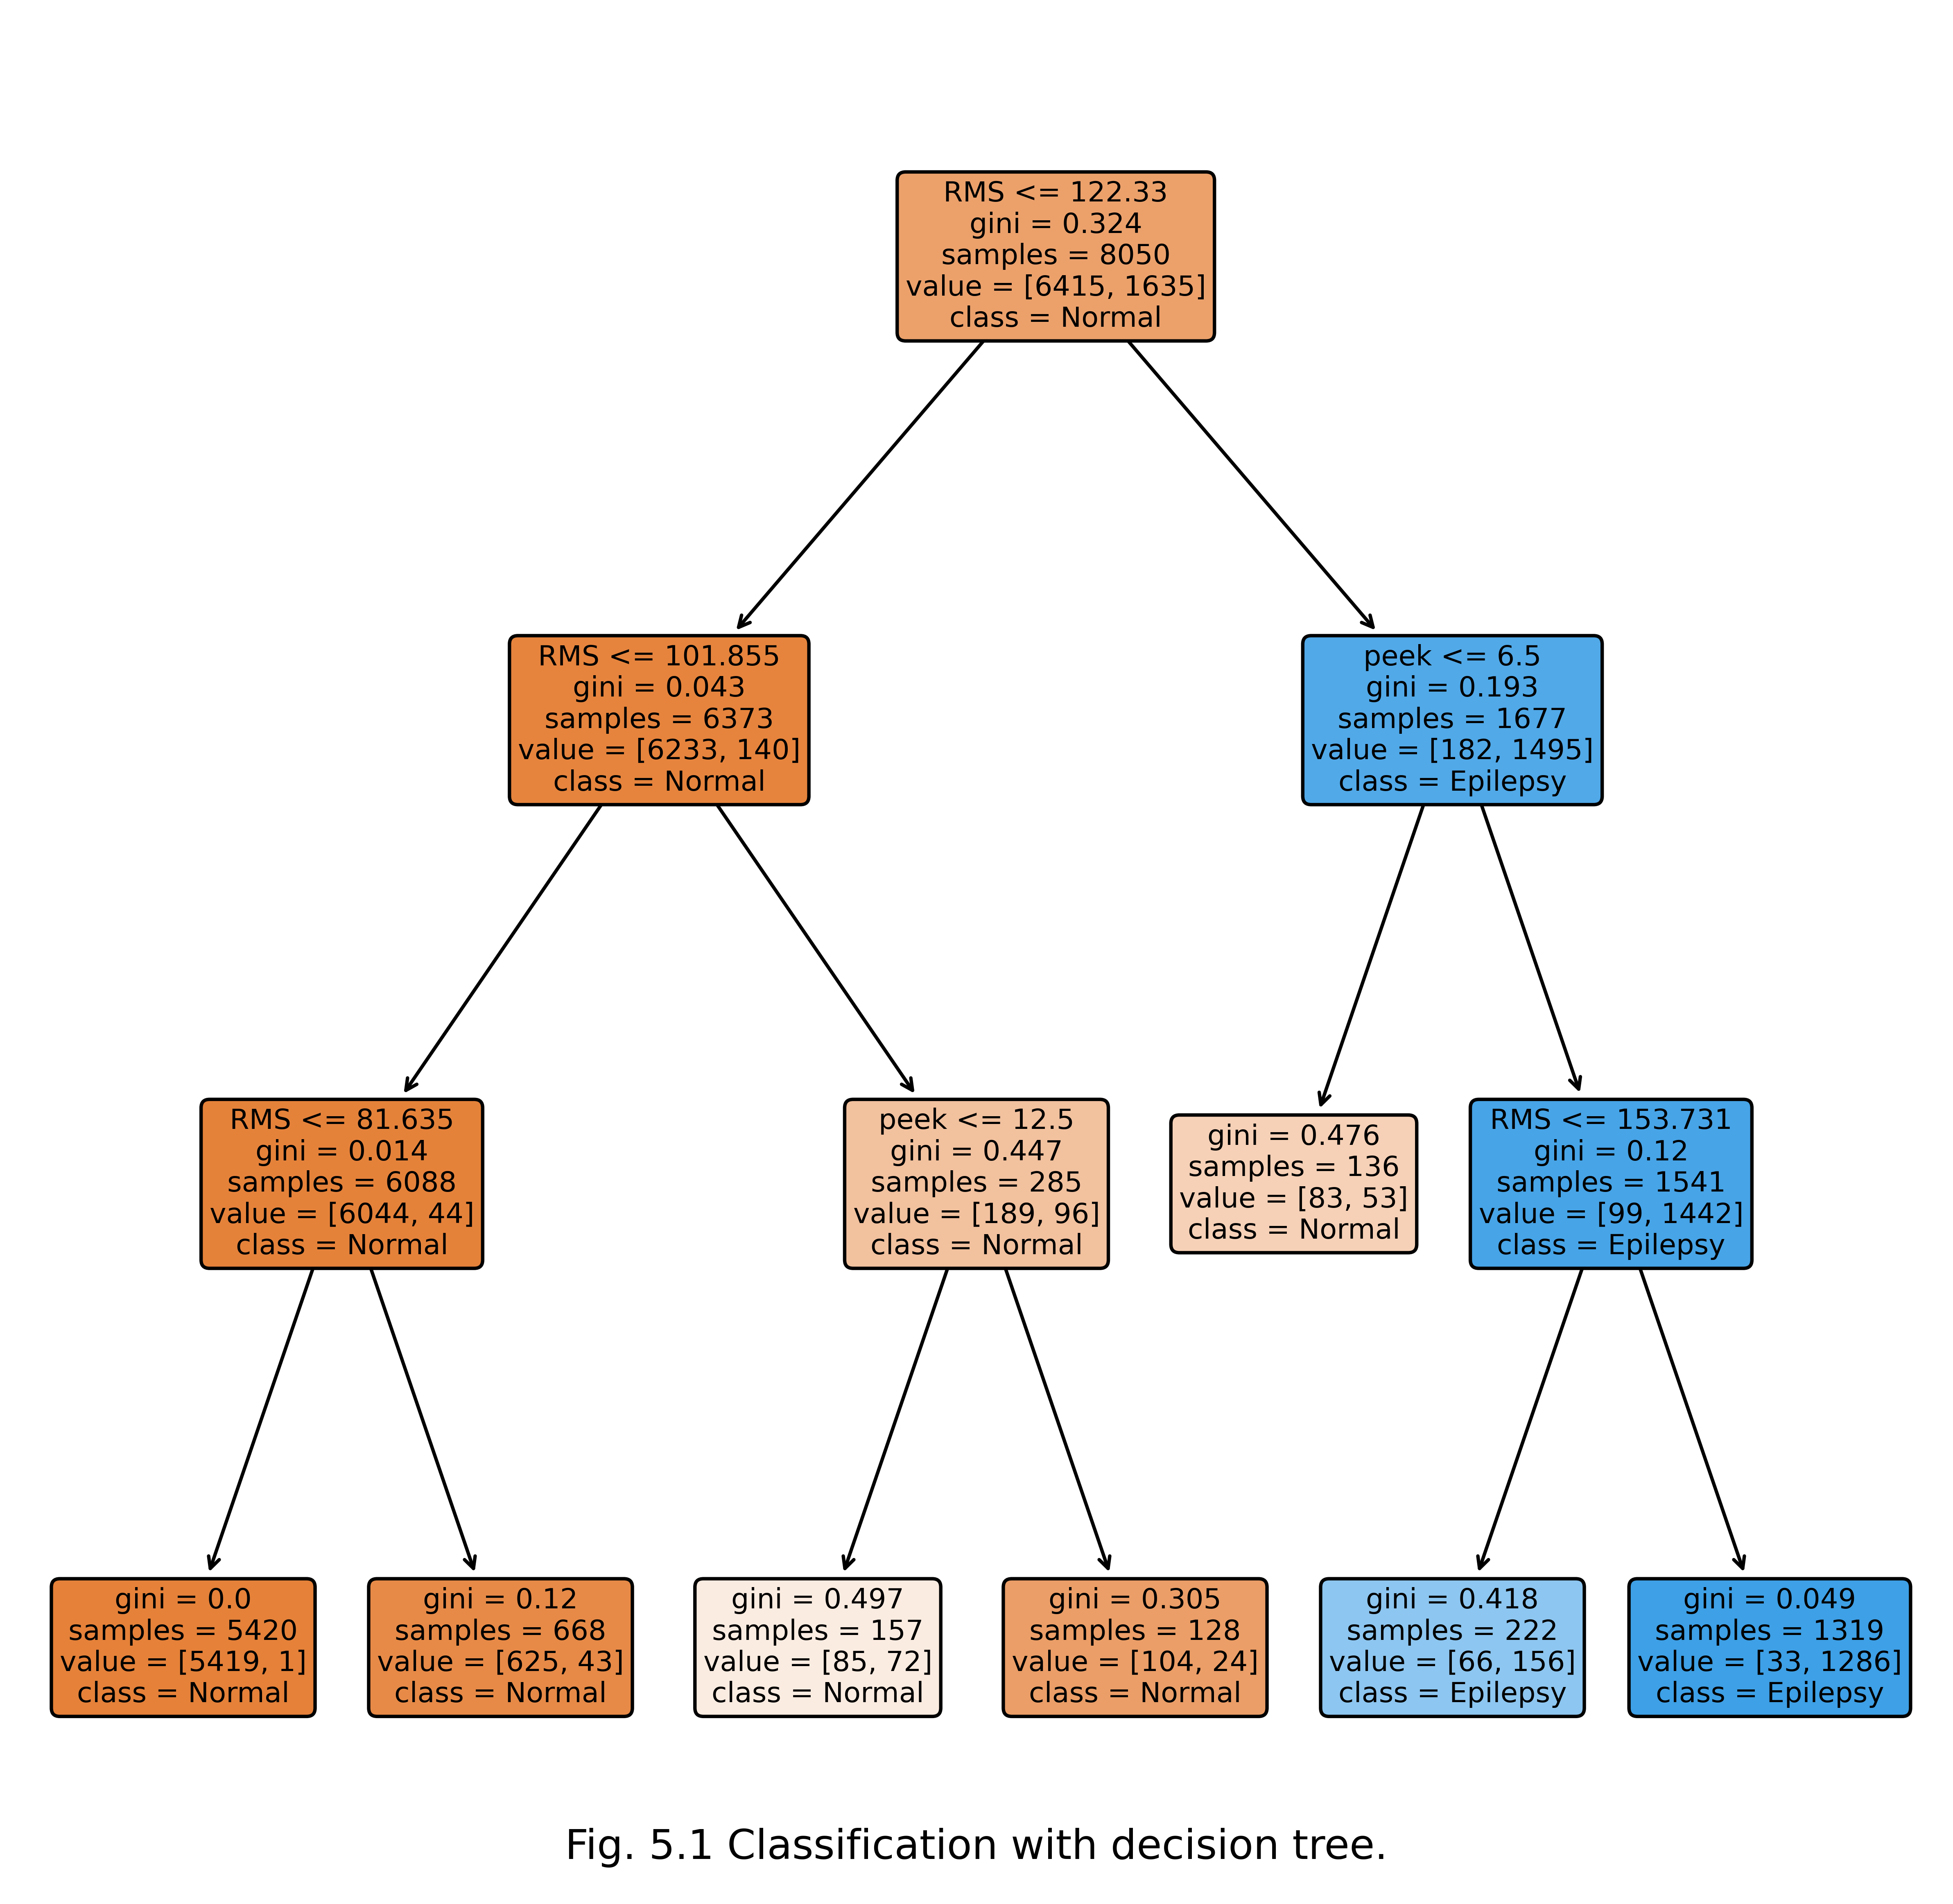

In [9]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
fn = ['ApEn', 'peek', 'RMS', 'mean frequency']

tree.plot_tree(dt2,
               feature_names = fn, 
               class_names=['Normal', 'Epilepsy'],
               filled = True, rounded=True)

plt.title('Fig. 5.1 Classification with decision tree.', y=0)
fig.savefig(r'output\Fig. 5.1 Classification with decision tree.png', dpi=600)

### Exclude peek

In [6]:
x_traindt1=pd.read_csv(r'classification\DT\exclude peek\x_dttrain.csv', index_col=0)
y_traindt1=pd.read_csv(r'classification\DT\exclude peek\y_dttrain.csv', index_col=0)
x_testdt1=pd.read_csv(r'classification\DT\exclude peek\x_dttest.csv', index_col=0)
y_testdt1=pd.read_csv(r'classification\DT\exclude peek\y_dttest.csv', index_col=0)

In [7]:
dt1 = joblib.load('classification\DT\exclude peek\EEG_dtree.m')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


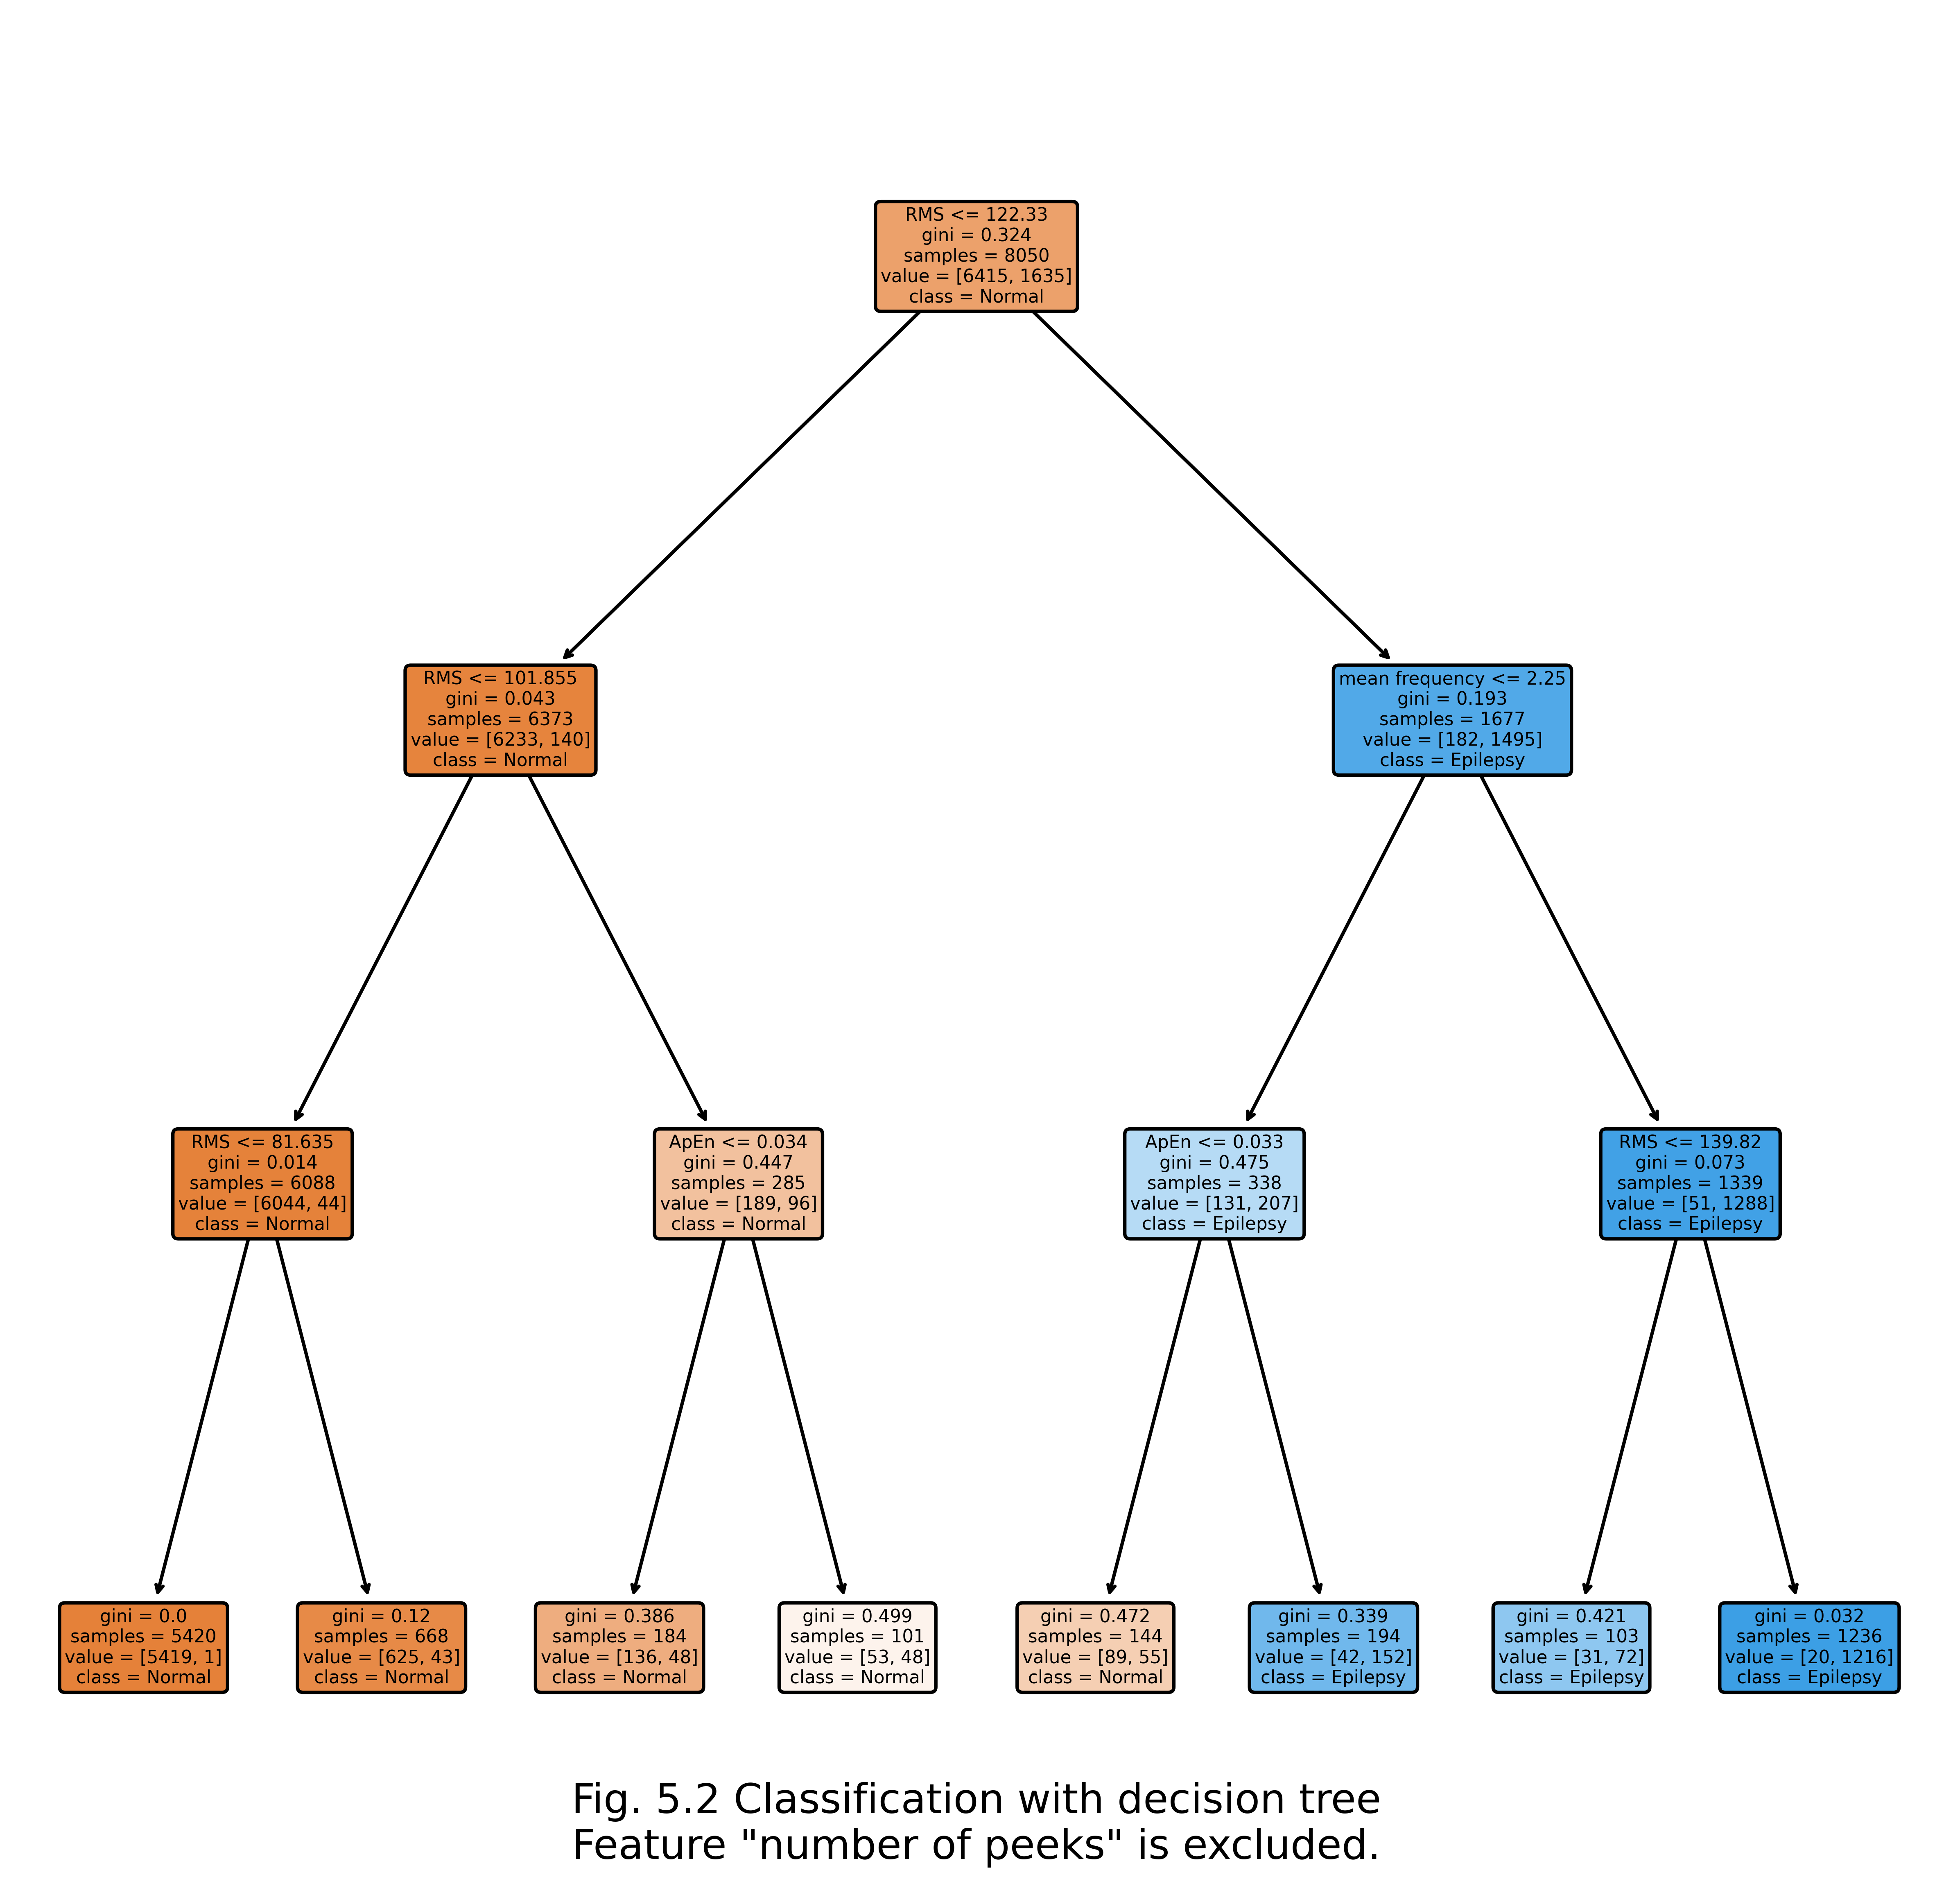

In [8]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
fn = ['ApEn', 'RMS', 'mean frequency']
tree.plot_tree(dt1,
               feature_names = fn, 
               class_names=['Normal', 'Epilepsy'],
               filled = True, rounded=True)
plt.title('Fig. 5.2 Classification with decision tree\nFeature "number of peeks" is excluded.', y=0)
fig.savefig(r'output\Fig. 5.2 Classification with decision tree.png', dpi=600)